# Unsupervised Learning
Unsupervised learning algorithms are used to group cases based on similar attributes, or naturally occurring trends, patterns, or relationships in the data. These models also are referred to as self-organizing maps. No labels are given to the learning algorithm, leaving it on its own to find structure in its input.

In [1]:
#To generate clustering and classification dataset
from sklearn.datasets import make_blobs

n_samples = 10000
centers = [(-2.5, -2.5), (2.5, 2.5), (7.5, -2.5)]

X,y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0, centers=centers, random_state=1)

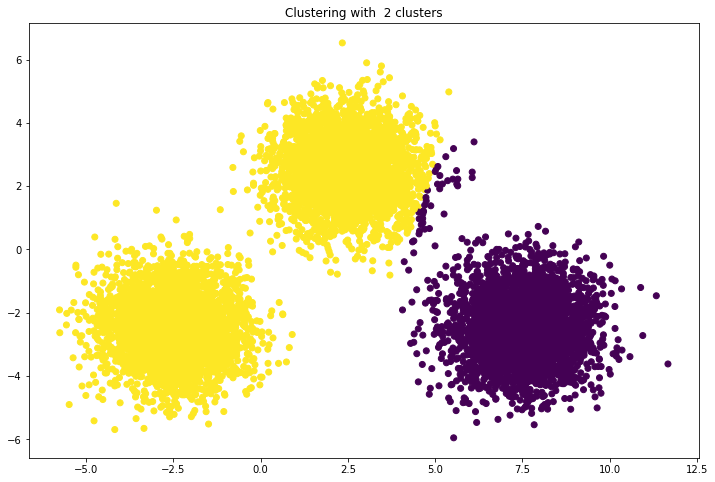

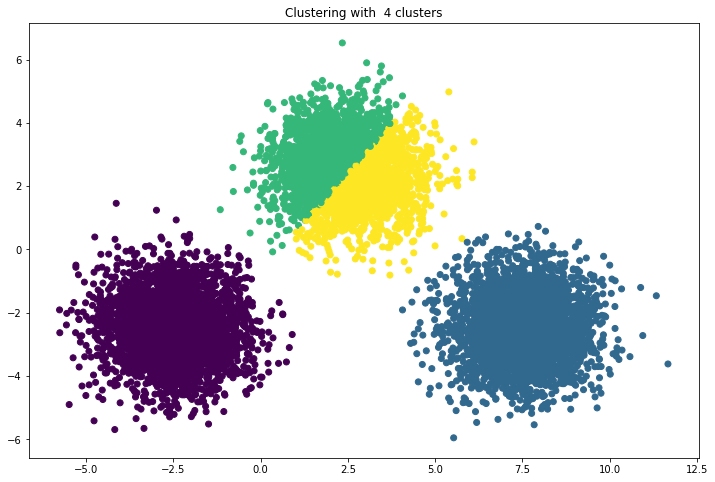

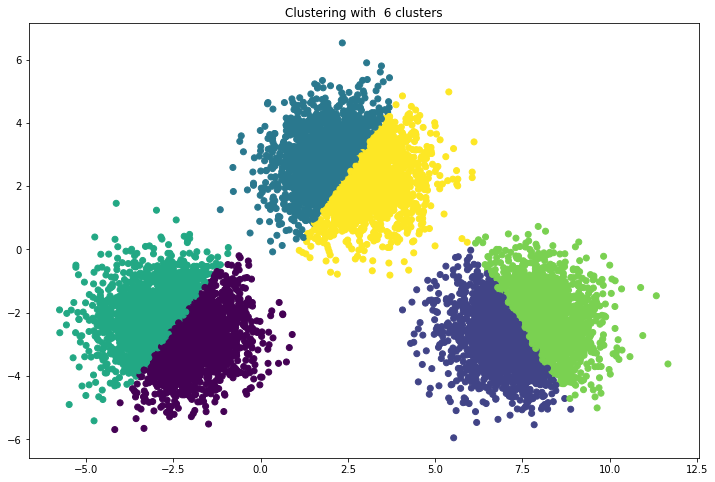

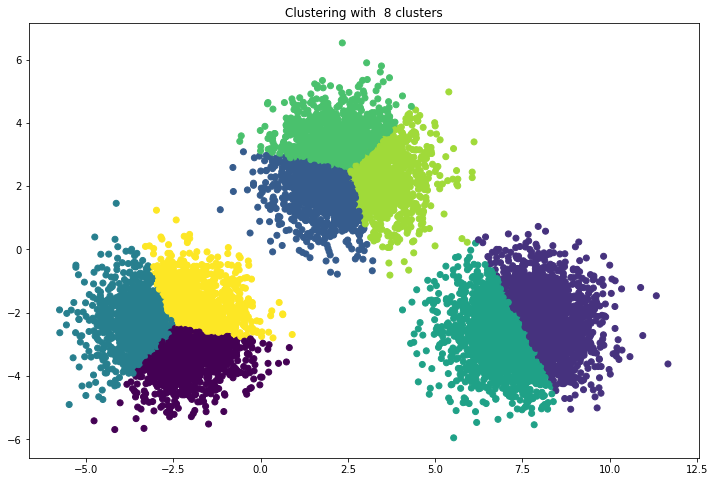

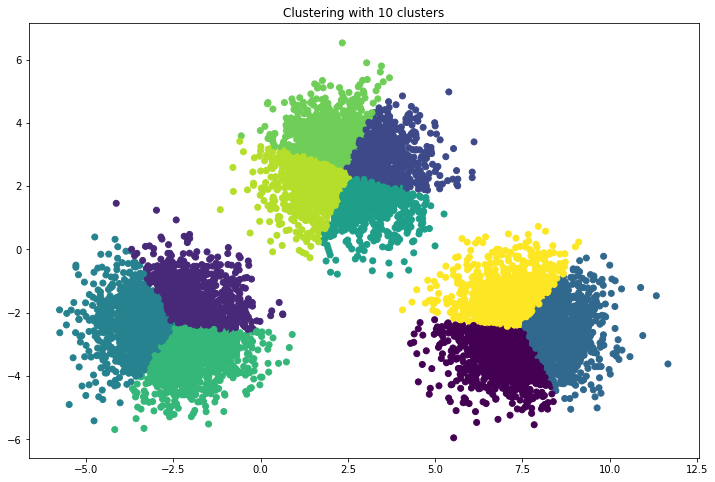

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

#Kmeans for clustering
from sklearn.cluster import KMeans

# For different number of clusters
for numclust in [2,4,6,8,10]:
    #Create a model and train it
    kmeans = KMeans(n_clusters=numclust, n_init=10)
    cluster_labels= kmeans.fit_predict(X)
    plt.figure(figsize=(12,8))
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)
    plt.title("Clustering with %2i clusters" % numclust)
    plt.show()


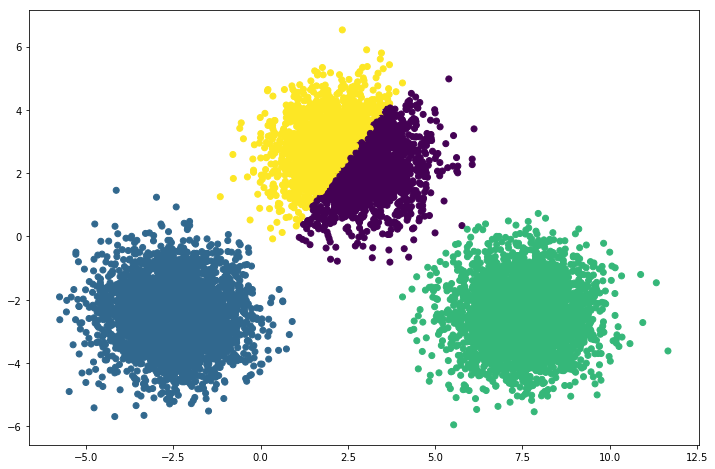

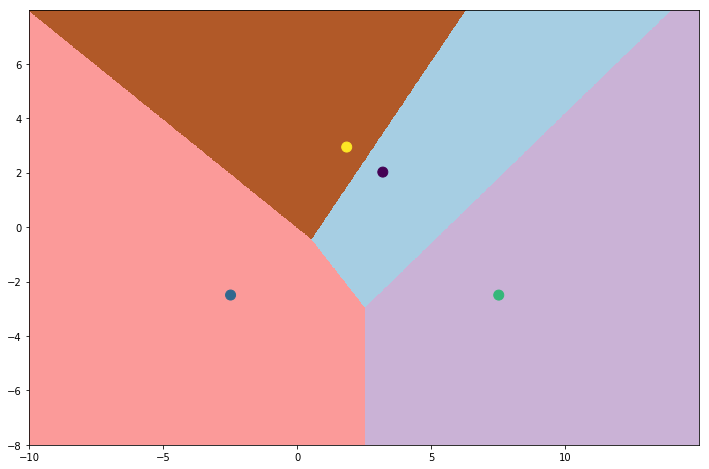

In [3]:
import numpy as np

kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()


h = .02
xx, yy = np.meshgrid(np.arange(-10, 15, h), np.arange(-8, 8, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=kmeans.predict(kmeans.cluster_centers_), s=100)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')


# Prediction

After training model, we are able to make predictions for new data

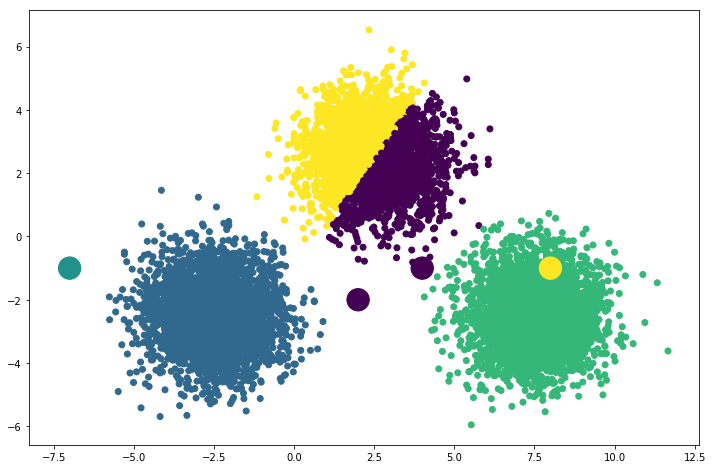

In [4]:
x_new = np.array([[-7,-1],[2,-2],[8,-1],[4,-1]])

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(x_new[:,0], x_new[:,1], c=kmeans.predict(x_new), s=500)
plt.show()

# Supervised Learning¶
Supervised learning is a learning in which we train using data which is already labeled. A supervised learning algorithms learns from labeled training data, provide us to predict outcomes for new data.

Examples:

- Prediction for sales 
- Prediction for customer churn status

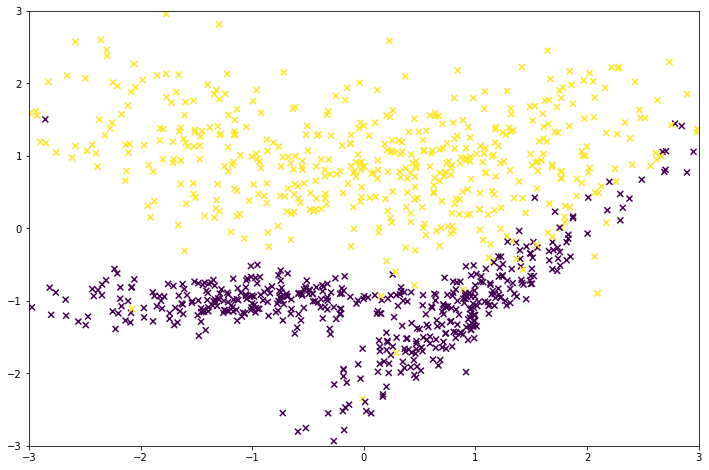

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

# Create dataset
sample = 1000
X,y = make_classification(n_samples= sample, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=2, random_state=0)


#Plot
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], marker='x', c=y)
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.show()

h = .02
xx, yy = np.meshgrid(np.arange(-3,3, h), np.arange(-3,3, h))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


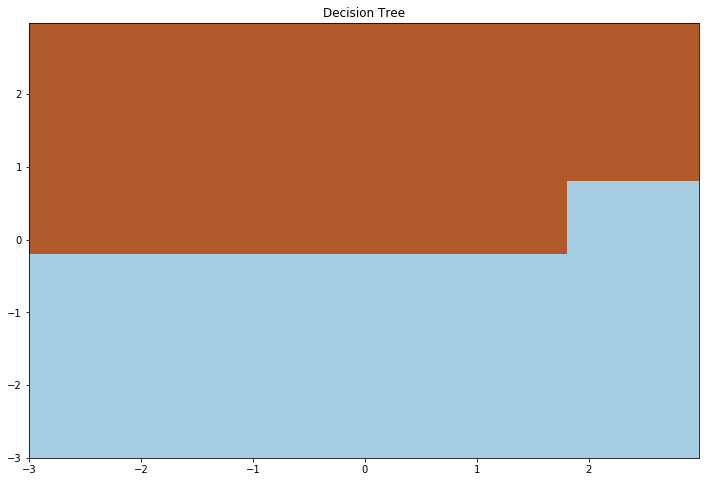

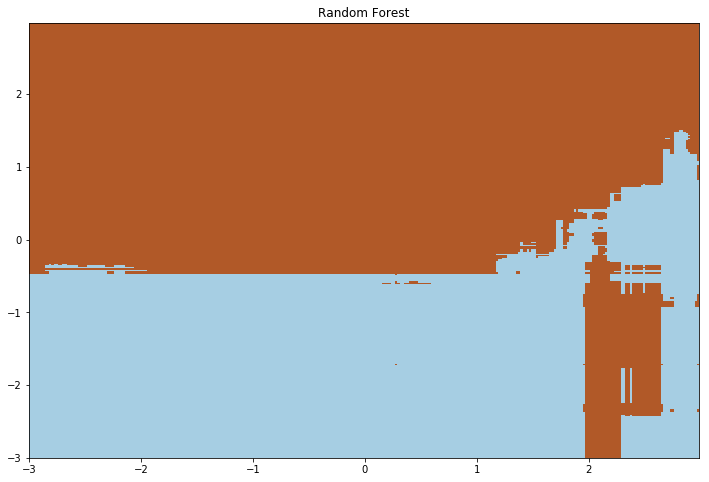

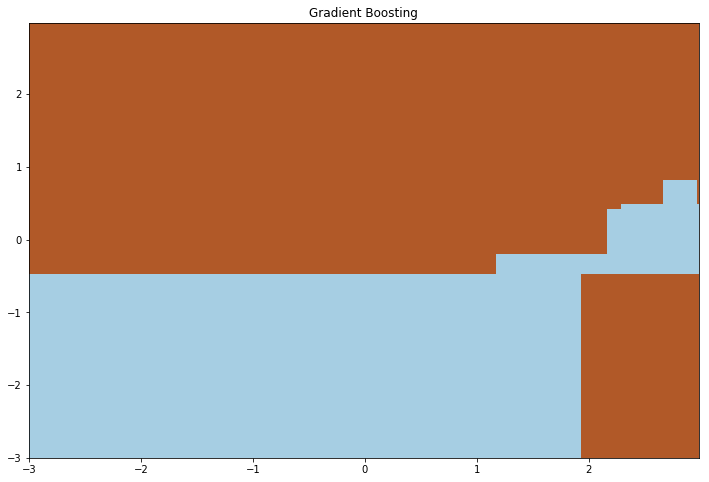

In [6]:
#Classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


#Decision Tree Plot
clf_dt = DecisionTreeClassifier(min_samples_leaf=20)
clf_dt.fit(X,y)

Z = clf_dt.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.title("Decision Tree")
plt.show()

#Random Forest Plot
clf_rf = RandomForestClassifier(n_estimators = 100)
clf_rf.fit(X,y)

Z = clf_rf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.title("Random Forest")
plt.show()



#Gradient Boosting Plot
clf_gb = GradientBoostingClassifier(n_estimators = 10)
clf_gb.fit(X,y)

Z = clf_gb.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.title("Gradient Boosting")
plt.show()

# Prediction
After training model, we are able to make predictions for new data

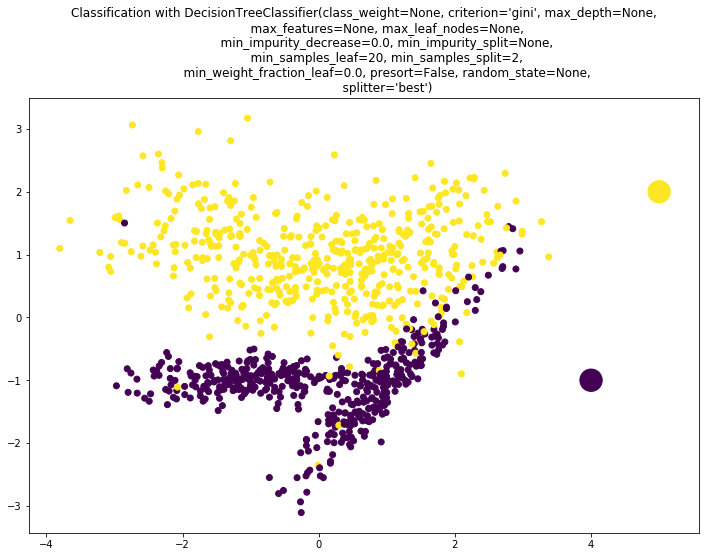

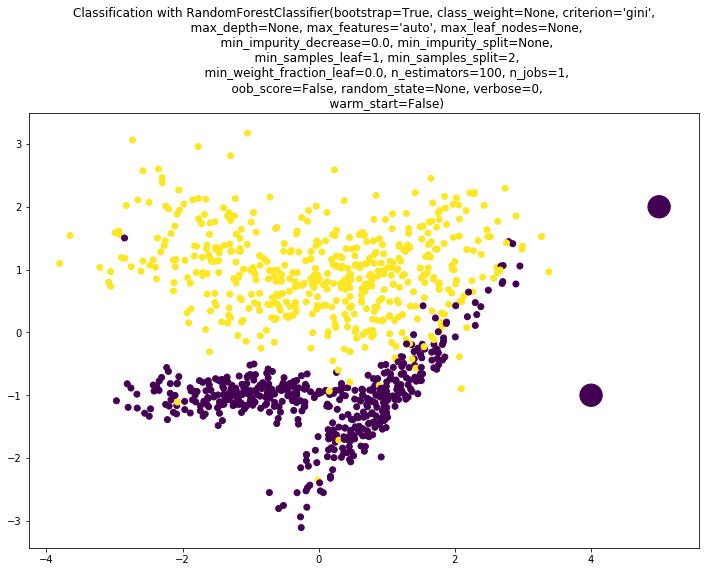

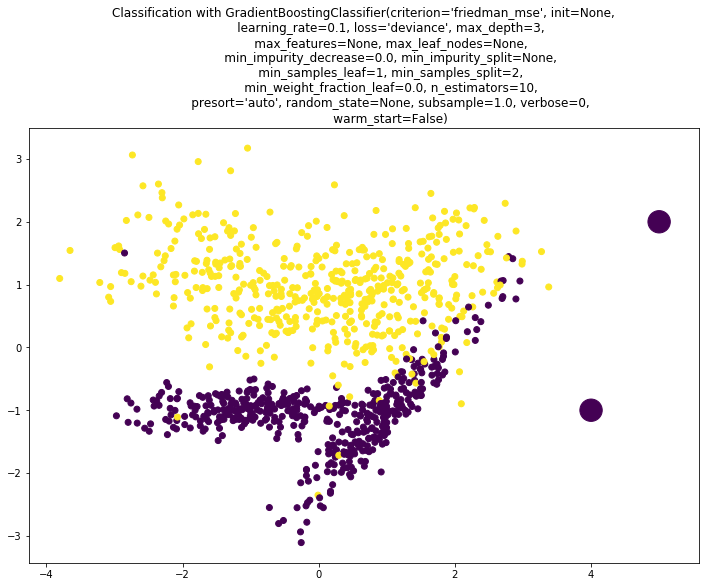

In [7]:
#2 new observations
x_new = np.array([[4,-1],[5,2]])

for model in [clf_dt, clf_rf, clf_gb]:
    plt.figure(figsize=(12,8))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.scatter(x_new[:,0], x_new[:,1],c=model.predict(x_new), s=500)
    plt.title("Classification with %2s" % model)
    plt.show()